## 1. Import data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()



In [3]:
print("Size of X_train:", X_train.shape) 
print("Size of Y_train:", Y_train.shape) 
print("Size of X_test:", X_test.shape)    
print("Size of Y_test:", Y_test.shape) 

Size of X_train: (60000, 28, 28)
Size of Y_train: (60000,)
Size of X_test: (10000, 28, 28)
Size of Y_test: (10000,)


In [6]:
# Reshape the data
X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)

# Check data dimensions
print(f"Training data shape: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {Y_test.shape}")

Training data shape: (60000, 784), Labels: (60000,)
Testing data shape: (10000, 784), Labels: (10000,)


In [7]:
import pandas as pd

pixel = dict()
pixel["label"] = Y_train.flatten()  # Flatten Y_train to make it 1-dimensional
for i in range(X_train.shape[1]):
    pixel["pixel " + str(i+1)] = X_train[:,i]
df_train = pd.DataFrame(pixel)
df_train.head(10)  # Use .head() instead of [:5] for better readability

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,1,1,0,0,...,0,0,3,0,82,237,231,70,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show data

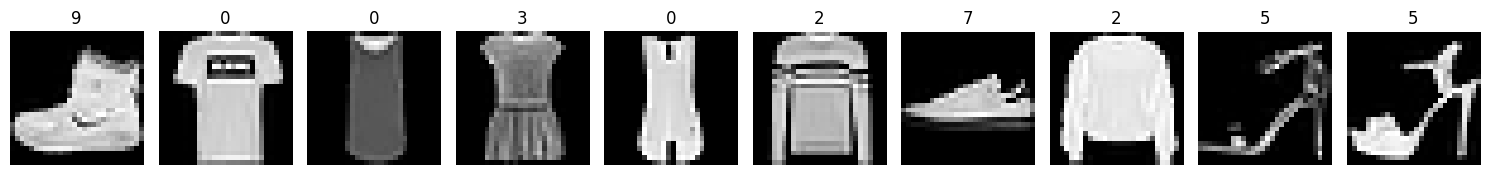

In [8]:
# Display some sample data
def plot_samples(X, Y, n=10):
    plt.figure(figsize=(15, 2))  # Increased figure size for better visibility
    for i in range(n):
        plt.subplot(1, n, i + 1)
        # Reshape to 28x28 and normalize pixel values
        img = X[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(str(Y[i]))  # Y is already 1D, so we don't need [0]
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 5 samples
plot_samples(X_train, Y_train, n=10)

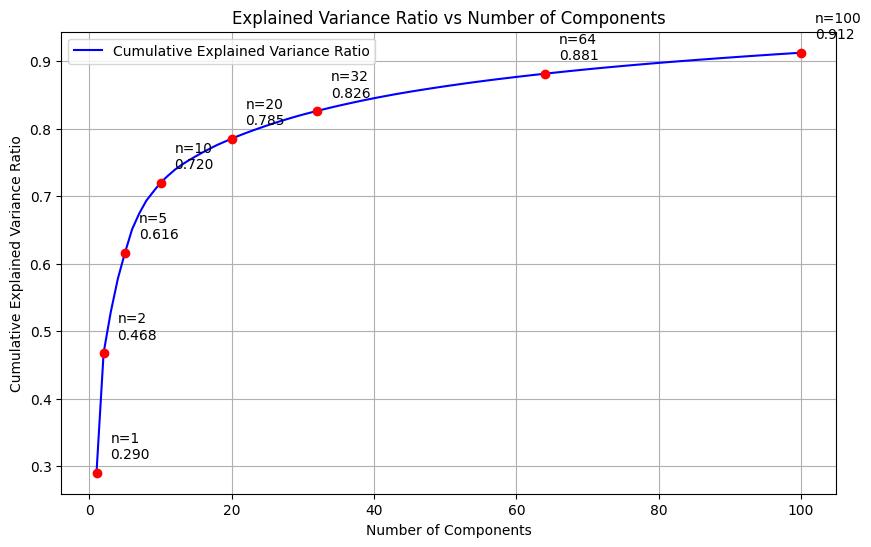


Variance ratio retained with different number of components:
n_components = 1: 29.04%
n_components = 2: 46.79%
n_components = 5: 61.62%
n_components = 10: 71.99%
n_components = 20: 78.51%
n_components = 32: 82.61%
n_components = 64: 88.13%
n_components = 100: 91.23%


In [43]:
# Thêm cell mới với tiêu đề markdown
## 2. Analyze Variance Ratio

# Code cell
from pca import PCA
import matplotlib.pyplot as plt

# Chuẩn hóa dữ liệu
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Khởi tạo PCA với số components tối đa
n_components_max = 100
pca = PCA(n_components=n_components_max)
pca.fit(X_train_norm)

# Tính cumulative variance ratio
cum_var_ratio = pca.information_percent()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_max + 1), cum_var_ratio, 'b-', label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.legend()

# Thêm một số điểm đánh dấu quan trọng
for n in [1, 2, 5, 10, 20, 32, 64, 100]:  # Removed 784 since it's out of bounds
    plt.plot(n, cum_var_ratio[n-1], 'ro')
    plt.annotate(f'n={n}\n{cum_var_ratio[n-1]:.3f}', 
                xy=(n, cum_var_ratio[n-1]), 
                xytext=(10, 10),
                textcoords='offset points')

plt.show()

# In ra tỷ lệ variance được giữ lại với các số components khác nhau
print("\nVariance ratio retained with different number of components:")
for n in [1, 2, 5, 10, 20, 32, 64, 100]:  # Removed 784 since it's out of bounds
    print(f"n_components = {n}: {cum_var_ratio[n-1]*100:.2f}%")

## 2. Principal components analysis with 16 components

In [40]:
from pca import PCA

n_component = 32
pca = PCA(n_components=n_component)
# pca.fit(X_train)
# pca_train = pca.transform(X_train)
# pca_test = pca.transform(X_test)

pca_train = pca.fit_transform(X_train)
pca_test = pca.fit_transform(X_test)


## Show 16 components

In [24]:
col_names_train = dict()
for i in range(n_component):
    col_names_train["PCs " + str(i + 1)] = pca_train[:, i]

df_train_pca = pd.DataFrame(col_names_train)
df_train_pca["Label"] = Y_train
df_train_pca[:10]

,PCs 1,PCs 2,Label
0,-123.993791,1633.074396,9
1,1407.928853,-451.641336,0
2,-725.910795,-1101.838138,0
3,31.398664,-981.067672,3
4,804.119258,-1201.168720,0
5,1177.509194,504.451223,2
6,-1493.518389,342.610132,7
7,1827.994051,1676.243004,2
8,-1583.028600,-385.753718,5
9,-945.689503,415.566577,5


## Plot data with 16 components

[0.29166946 0.46807613 0.52823624 0.57774205 0.61606109 0.65057567
 0.67427347 0.69328666 0.70649533 0.71944416 0.72933491 0.73855463
 0.74615149 0.75262662 0.75883389 0.76468648 0.77026154 0.77559665
 0.78040858 0.78485898 0.78923659 0.79332917 0.79718551 0.80094049
 0.80459614 0.80803427 0.81143686 0.81458071 0.81770592 0.82072047
 0.82350141 0.82624178]


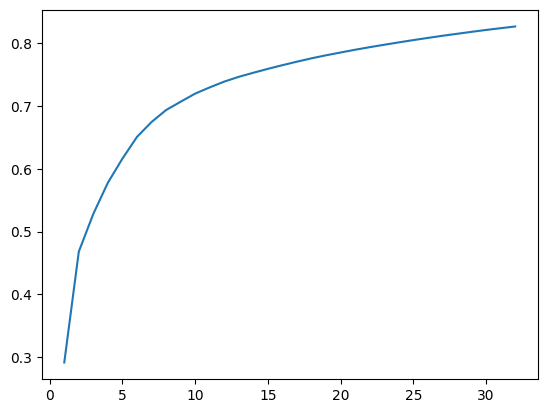

In [41]:
import numpy as np

x = np.arange(1, n_component+1)
y = pca.information_percent()
print(y)
plt.plot(x, y)
plt.show()

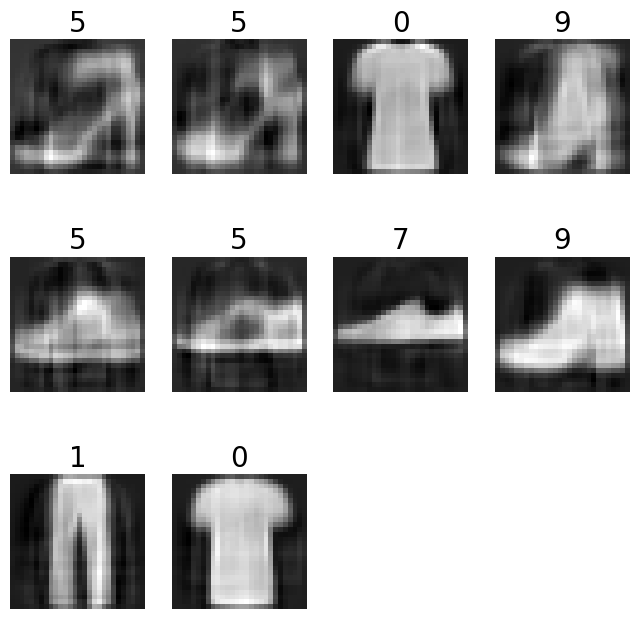

In [16]:
project_data = pca.project_data(X_train)
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(3, 4, i + 1)  # Changed from 330 + i + 1 to 3, 4, i + 1
    plt.imshow(project_data[i + 8].reshape(28,28),cmap='gray')
    plt.title(Y_train[i + 8], fontsize=20)
    plt.axis("off")
plt.show()

In [ ]:
## Visualize data before and after dimensionality reduction

from sklearn.manifold import TSNE
import seaborn as sns

# Function to plot t-SNE visualization
def plot_tsne(X, y, title):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='deep', legend='full')
    plt.title(title)
    plt.show()

# Visualize original data (using a subset for faster computation)
n_samples = 2000
indices = np.random.choice(X_train.shape[0], n_samples, replace=False)
X_subset = X_train[indices]
y_subset = Y_train[indices]

plot_tsne(X_subset, y_subset, "t-SNE visualization of original data")

# Visualize PCA-reduced data
n_components = 100  # You can adjust this
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_subset)

plot_tsne(X_pca, y_subset, f"t-SNE visualization of PCA-reduced data ({n_components} components)")
